# Linear Regression

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import random
np.random.seed(42)

## Load the data

In [192]:
f = open("./data/beer_50000.json", 'r')
data = [eval(line) for line in f]
f.close()
np.random.shuffle(data)

In [193]:
def feature(datum):
    ABV = float(datum["beer/ABV"])
    return [1, ABV]

In [194]:
X = np.array([feature(d) for d in data])
y = np.array([[d['review/overall']] for d in data])

In [195]:
Xtrain = X[:40000]
ytrain = y[:40000]
Xval = X[40000:45000]
yval = y[40000:45000]
Xtest = X[45000:]
ytest = y[45000:]
len(Xtrain), len(Xval), len(Xtest)

(40000, 5000, 5000)

In [205]:
# Set up a loss function with regularization
def MSE(targets, predictions):
    return (1/targets.shape[0]) * (targets - predictions).sum()**2 + 0.001*(theta**2).sum()

In [206]:
# Initialize random weights
theta = np.array([[0.05808361],[0.86617615]])
alpha = 0.001
epochs = 100
training_loss = []
validation_loss = []
strike = 0
for epoch in range(1, epochs):
    predictions = Xtrain.dot(theta)
    loss = MSE(ytrain, predictions)
    training_loss.append(loss)
    error = ytrain - predictions
    theta += alpha * (2/ytrain.shape[0]) * Xtrain.T.dot(error) + 2*0.001* theta.sum()
    
    # Validation
    predictions_val = Xval.dot(theta)
    loss_val = MSE(yval, predictions_val)
    
    print("Epoch: {}, MSE: {}".format(epoch, loss_val))
    
    if epoch > 1:
        if validation_loss[-1] < loss_val:
            validation_loss.append(loss_val)
            break
        
    validation_loss.append(loss_val)
    
        
    


Epoch: 1, MSE: 25020.86125640157
Epoch: 2, MSE: 18831.810990884187
Epoch: 3, MSE: 14110.481965062376
Epoch: 4, MSE: 10517.554536950815
Epoch: 5, MSE: 7791.148607196088
Epoch: 6, MSE: 5729.268725502922
Epoch: 7, MSE: 4176.214654854019
Epoch: 8, MSE: 3012.0633282167637
Epoch: 9, MSE: 2144.5295084258623
Epoch: 10, MSE: 1502.668505173686
Epoch: 11, MSE: 1032.005215667904
Epoch: 12, MSE: 690.7674440270378
Epoch: 13, MSE: 446.9740462543298
Epoch: 14, MSE: 276.18469121032626
Epoch: 15, MSE: 159.7616033620331
Epoch: 16, MSE: 83.52741204288897
Epoch: 17, MSE: 36.72938453053121
Epoch: 18, MSE: 11.240579067253497
Epoch: 19, MSE: 0.9441461748204127
Epoch: 20, MSE: 1.2591606889722897


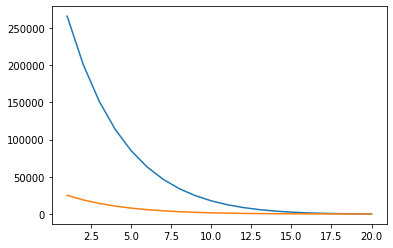

In [207]:
x = np.arange(1, len(validation_loss) + 1, 1)
plt.plot(x, training_loss)
plt.plot(x, validation_loss)

In [208]:
# Test
predictions = Xtest.dot(theta)
mse = MSE(ytest, predictions)
r2 = 1 - (mse/ytest.var())
r2

0.6962812013988094

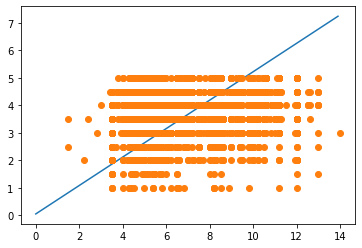

In [211]:
# Show the line that is made 
values = [d[1] for d in Xtest if d[1] < 20]
maxi = max(values)
x = np.arange(0, maxi,0.1)
y = [theta[0] + theta[1]*v for v in x]
plt.plot(x, y)

# Plot all ratings
ratings = [d for d in ytest]
plt.plot(values, ratings, "o")